# Solución de Navier para placas

In [1]:
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [2]:
%matplotlib widget

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Carga uniforme

En este caso la solución está dada por



In [4]:
def w_carga_uniforme(x, y, m_max, n_max, q0=1, D=1, a=1, b=1):
    w = 0*x
    for m in range(1, m_max + 2, 2):
        for n in range(1, n_max + 2, 2):
            coef = 1/(m*n*(m**2/a**2 + n**2/b**2)**2)
            w += coef * np.sin(m*np.pi*x/a)*np.sin(n*np.pi*y/a)
    return 16*q0*w/(np.pi**6*D)

In [27]:
def Mxx_carga_uniforme(x, y, m_max, n_max, q0=1, D=1, nu=0.3, a=1, b=1):
    Mxx = 0*x
    for m in range(1, m_max + 2, 2):
        for n in range(1, n_max + 2, 2):
            coef = ((m/a)**2 + nu*(n/b)**2)/(m*n*(m**2/a**2 + n**2/b**2)**2)
            Mxx += coef * np.sin(m*np.pi*x/a)*np.sin(n*np.pi*y/a)
    return 16*q0*Mxx/np.pi**4


def Myy_carga_uniforme(x, y, m_max, n_max, q0=1, D=1, nu=0.3, a=1, b=1):
    Myy = 0*x
    for m in range(1, m_max + 2, 2):
        for n in range(1, n_max + 2, 2):
            coef = (nu*(m/a)**2 + (n/b)**2)/(m*n*(m**2/a**2 + n**2/b**2)**2)
            Myy += coef * np.sin(m*np.pi*x/a)*np.sin(n*np.pi*y/a)
    return 16*q0*Myy/np.pi**4


def Mxy_carga_uniforme(x, y, m_max, n_max, q0=1, D=1, nu=0.3, a=1, b=1):
    Mxy = 0*x
    for m in range(1, m_max + 2, 2):
        for n in range(1, n_max + 2, 2):
            coef = 1/(m*n*(m**2/a**2 + n**2/b**2)**2)
            Mxy += coef * np.cos(m*np.pi*x/a)*np.cos(n*np.pi*y/a)
    return -16*(1 - nu)*q0*Mxy/(a*b*np.pi**4)

## Deflexión

In [6]:
w_carga_uniforme(0.5, 0.5, 1, 1)

0.00416064589318341

In [7]:
w_max = [w_carga_uniforme(0.5, 0.5, k, k)*np.pi**6/4 for k in range(1, 21)]

Text(0.5, 0, 'Número de términos en la serie')

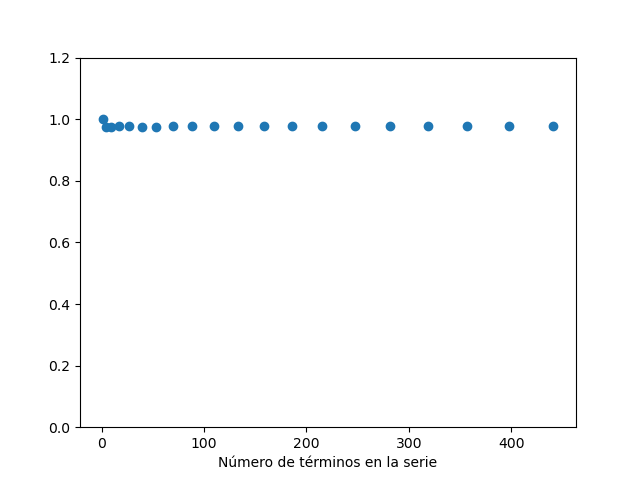

In [8]:
plt.figure()
plt.plot(np.linspace(1, 21, 20)**2, w_max, "o")
plt.ylim(0, 1.2)
plt.xlabel("Número de términos en la serie")

In [9]:
D = 1
nu = 0.3
q0 = 1
a = 1
Y, X = np.mgrid[0:1:21j, 0:1:21j]

In [10]:
W1 = w_carga_uniforme(X, Y, 1, 1)

Text(0.5, 0, '$w(x, y)$')

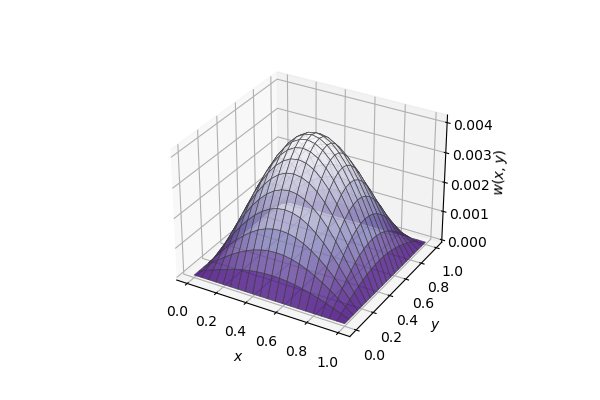

In [11]:
fig0 = plt.figure(figsize=(6, 4))
ax0 = fig0.add_subplot(111, projection='3d')
ax0.plot_surface(X, Y, W1, cmap="Purples_r", cstride=1, rstride=1, alpha=0.8,
               lw=0.5, edgecolor="#3c3c3c")
ax0.set_xlabel("$x$")
ax0.set_ylabel("$y$")
ax0.set_zlabel("$w(x, y)$")

In [12]:
W5 = w_carga_uniforme(X, Y, 5, 5)

Text(0.5, 0, '$w(x, y)$')

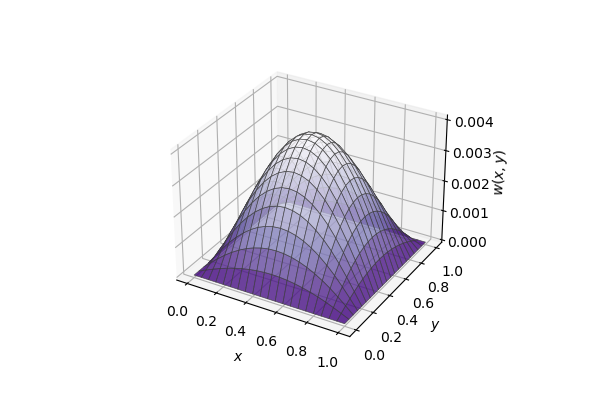

In [13]:
fig1 = plt.figure(figsize=(6, 4))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, W5, cmap="Purples_r", cstride=1, rstride=1, alpha=0.8,
               lw=0.5, edgecolor="#3c3c3c")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.set_zlabel("$w(x, y)$")

Text(0.5, 0, '$w(x, y)$')

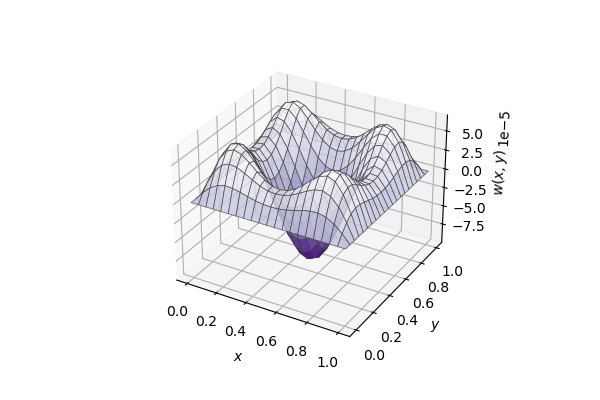

In [14]:
fig2 = plt.figure(figsize=(6, 4))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(X, Y, W5 - W1, cmap="Purples_r", cstride=1, rstride=1, alpha=0.8,
               lw=0.5, edgecolor="#3c3c3c")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$y$")
ax2.set_zlabel("$w(x, y)$")

## Momentos

In [15]:
Mxx_carga_uniforme(0.5, 0.5, 1, 1)

0.05338310772435856

In [16]:
Mxx_carga_uniforme(0.5, 0.5, 2, 2)

0.04692441074042381

In [19]:
Mxx_carga_uniforme(0.5, 0.5, 5, 5)

0.048233689832556915

In [21]:
Mxx_carga_uniforme(0.5, 0.5, 8, 8)

0.04796699560937743

In [22]:
Mxx_carga_uniforme(0.5, 0.5, 20, 20)

0.04789421590247124

In [23]:
Mxx_max = [Mxx_carga_uniforme(0.5, 0.5, k, k)*np.pi**4/4 for k in range(1, 21)]

Text(0.5, 0, 'Número de términos en la serie')

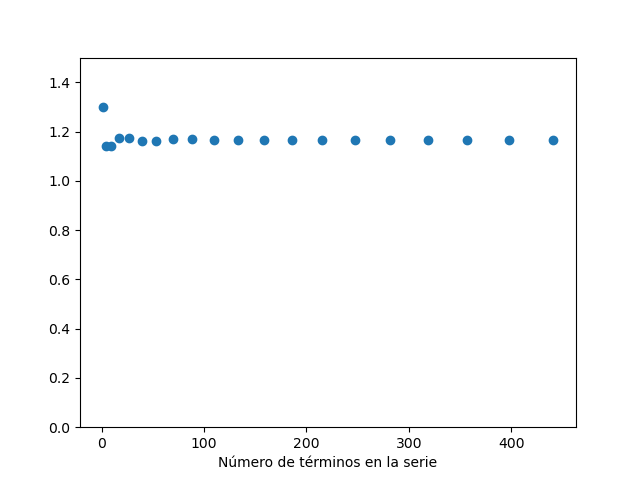

In [24]:
plt.figure()
plt.plot(np.linspace(1, 21, 20)**2, Mxx_max, "o")
plt.ylim(0, 1.5)
plt.xlabel("Número de términos en la serie")

In [28]:
Mxx_1 = Mxx_carga_uniforme(X, Y, 1, 1)
Mxy_1 = Mxy_carga_uniforme(X, Y, 1, 1)

In [35]:
Mxx_5 = Mxx_carga_uniforme(X, Y, 5, 5)
Mxy_5 = Mxy_carga_uniforme(X, Y, 5, 5)

In [40]:
Mxx_50 = Mxx_carga_uniforme(X, Y, 50, 50)
Mxy_50 = Mxy_carga_uniforme(X, Y, 50, 50)

In [36]:
Mxx_100 = Mxx_carga_uniforme(X, Y, 100, 100)
Mxy_100 = Mxy_carga_uniforme(X, Y, 100, 100)

Text(0.5, 0, '$w(x, y)$')

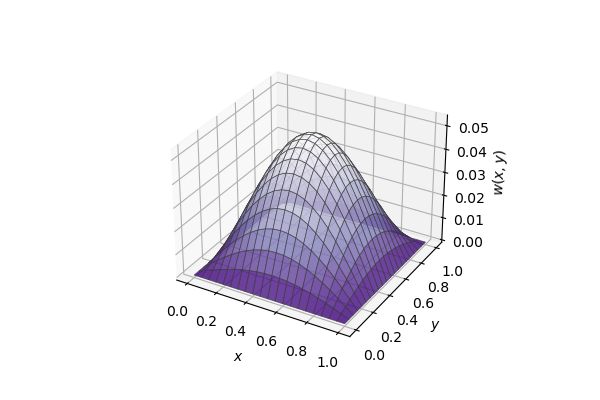

In [30]:
fig3 = plt.figure(figsize=(6, 4))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot_surface(X, Y, Mxx_1, cmap="Purples_r", cstride=1, rstride=1, alpha=0.8,
               lw=0.5, edgecolor="#3c3c3c")
ax3.set_xlabel("$x$")
ax3.set_ylabel("$y$")
ax3.set_zlabel("$w(x, y)$")

Text(0.5, 0, '$w(x, y)$')

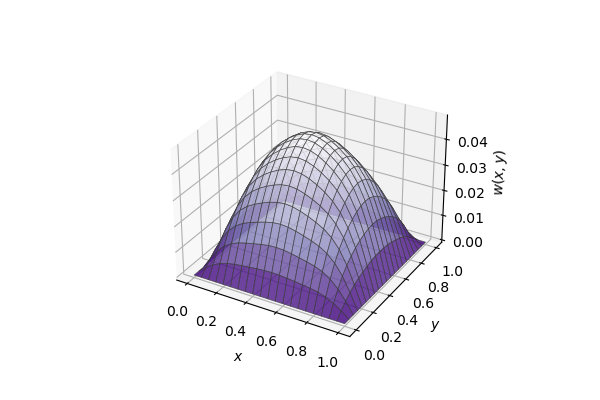

In [37]:
fig4 = plt.figure(figsize=(6, 4))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.plot_surface(X, Y, Mxx_5, cmap="Purples_r", cstride=1, rstride=1, alpha=0.8,
               lw=0.5, edgecolor="#3c3c3c")
ax4.set_xlabel("$x$")
ax4.set_ylabel("$y$")
ax4.set_zlabel("$w(x, y)$")

Text(0.5, 0, '$w(x, y)$')

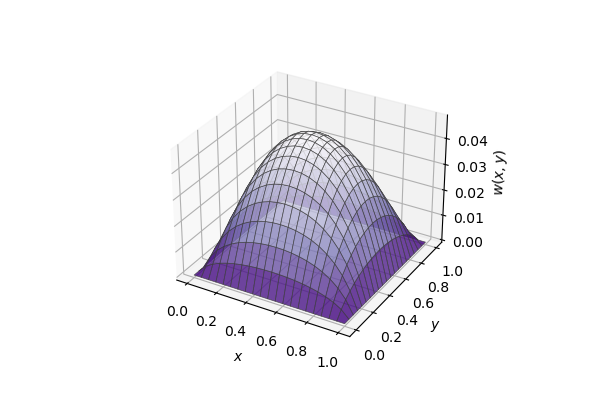

In [38]:
fig4 = plt.figure(figsize=(6, 4))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.plot_surface(X, Y, Mxx_100, cmap="Purples_r", cstride=1, rstride=1, alpha=0.8,
               lw=0.5, edgecolor="#3c3c3c")
ax4.set_xlabel("$x$")
ax4.set_ylabel("$y$")
ax4.set_zlabel("$w(x, y)$")

Text(0.5, 0, '$w(x, y)$')

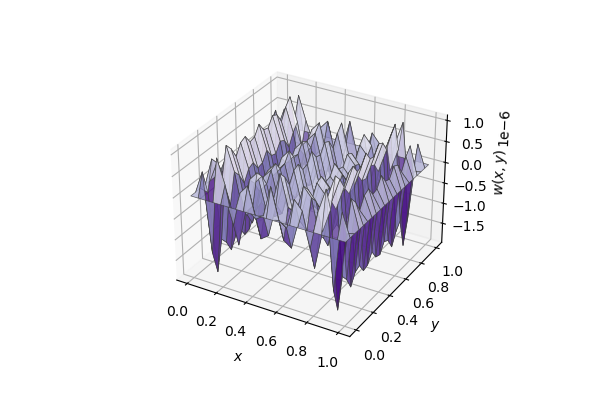

In [41]:
fig5 = plt.figure(figsize=(6, 4))
ax5 = fig5.add_subplot(111, projection='3d')
ax5.plot_surface(X, Y, Mxx_100 - Mxx_50, cmap="Purples_r", cstride=1, rstride=1, alpha=0.8,
               lw=0.5, edgecolor="#3c3c3c")
ax5.set_xlabel("$x$")
ax5.set_ylabel("$y$")
ax5.set_zlabel("$w(x, y)$")

Text(0.5, 0, '$w(x, y)$')

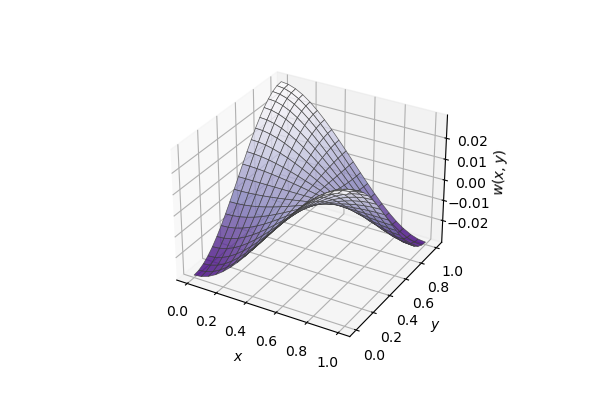

In [42]:
fig6 = plt.figure(figsize=(6, 4))
ax6 = fig6.add_subplot(111, projection='3d')
ax6.plot_surface(X, Y, Mxy_50, cmap="Purples_r", cstride=1, rstride=1, alpha=0.8,
               lw=0.5, edgecolor="#3c3c3c")
ax6.set_xlabel("$x$")
ax6.set_ylabel("$y$")
ax6.set_zlabel("$w(x, y)$")

Text(0.5, 0, '$w(x, y)$')

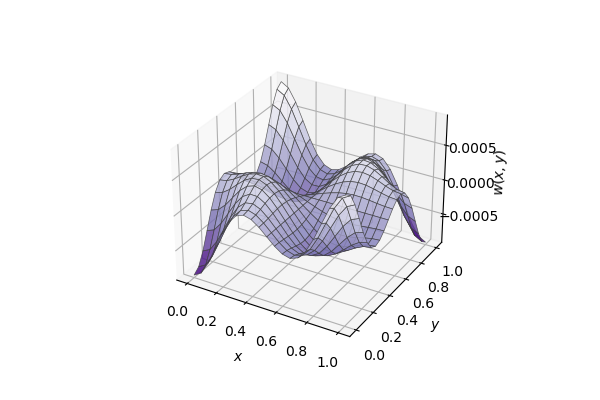

In [34]:
fig6 = plt.figure(figsize=(6, 4))
ax6 = fig6.add_subplot(111, projection='3d')
ax6.plot_surface(X, Y, Mxy_5 - Mxy_1, cmap="Purples_r", cstride=1, rstride=1, alpha=0.8,
               lw=0.5, edgecolor="#3c3c3c")
ax6.set_xlabel("$x$")
ax6.set_ylabel("$y$")
ax6.set_zlabel("$w(x, y)$")